In [1]:
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
%pylab inline
import random

Populating the interactive namespace from numpy and matplotlib


In [7]:
gamma = 0.5 # taxa de desconto
alpha = 0.5
tamanho_recompensa = -1
tamanho_grade = 4
estados_terminais = [[0,0], [tamanho_grade-1, tamanho_grade-1]]
acoes = [[-1, 0], [1, 0], [0, 1], [0, -1]]
numero_iteracoes = 1000

In [8]:
# initialization
V = np.zeros((tamanho_grade, tamanho_grade))
retornos = {(i, j):list() for i in range(tamanho_grade) for j in range(tamanho_grade)}
deltas = {(i, j):list() for i in range(tamanho_grade) for j in range(tamanho_grade)}
estados = [[i, j] for i in range(tamanho_grade) for j in range(tamanho_grade)]

In [9]:
# utils
def gera_estado_inicial():
    estado_inicial = random.choice(estados[1:-1])
    return estado_inicial

def gera_proxima_acao():
    return random.choice(acoes)

def toma_acao(estado, acao):
    if list(estado) in estados_terminais:
        return 0, None
    estado_final = np.array(estado) + np.array(acao)
    # if robot crosses wall
    if -1 in list(estado_final) or tamanho_grade in list(estado_final):
        estado_final = estado
    return tamanho_recompensa, list(estado_final)

In [11]:
for it in tqdm(range(numero_iteracoes)):
    estado = gera_estado_inicial()
    while True:
        acao = gera_proxima_acao()
        recompensa, estado_final = toma_acao(estado, acao)
        
        # we reached the end
        if estado_final is None:
            break
        
        # modify Value function
        antes =  V[estado[0], estado[1]]
        V[estado[0], estado[1]] += alpha*(recompensa + gamma*V[estado_final[0], estado_final[1]] - V[estado[0], estado[1]])
        deltas[estado[0], estado[1]].append(float(np.abs(antes-V[estado[0], estado[1]])))
        
        estado = estado_final

100%|██████████| 1000/1000 [00:00<00:00, 3242.44it/s]


In [12]:
V

array([[ 0.        , -1.9259593 , -1.99458336, -1.97596969],
       [-1.47324705, -1.98022422, -1.96873439, -1.98258931],
       [-1.97325523, -1.98186965, -1.78956225, -1.25682765],
       [-1.98743079, -1.99091684, -1.33055427,  0.        ]])

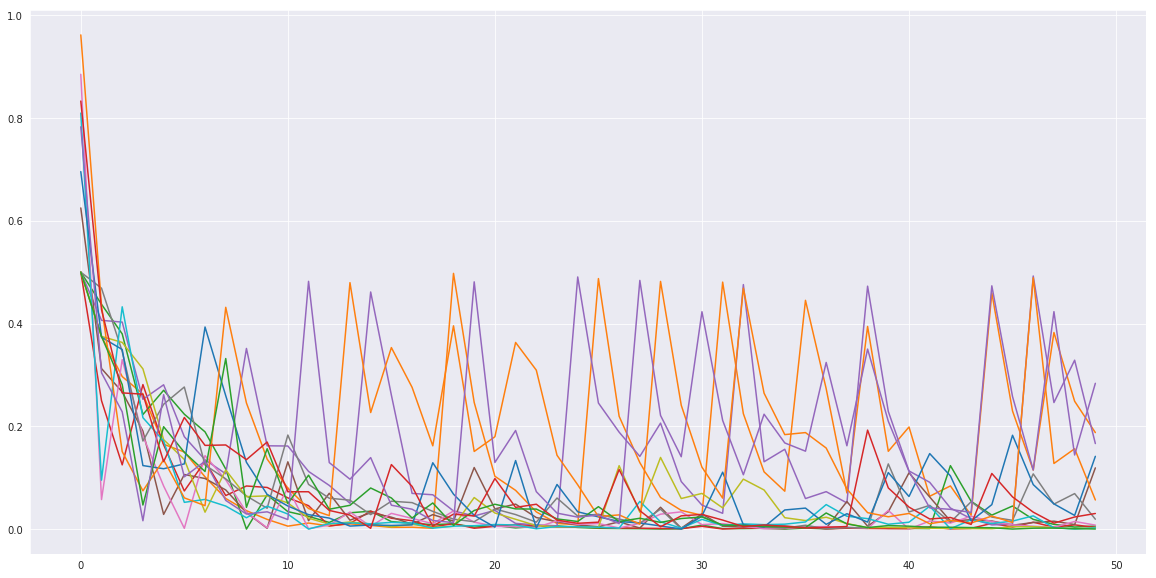

In [13]:
plt.figure(figsize=(20,10))
todas_series = [list(x)[:50] for x in deltas.values()]
for series in todas_series:
    plt.plot(series)

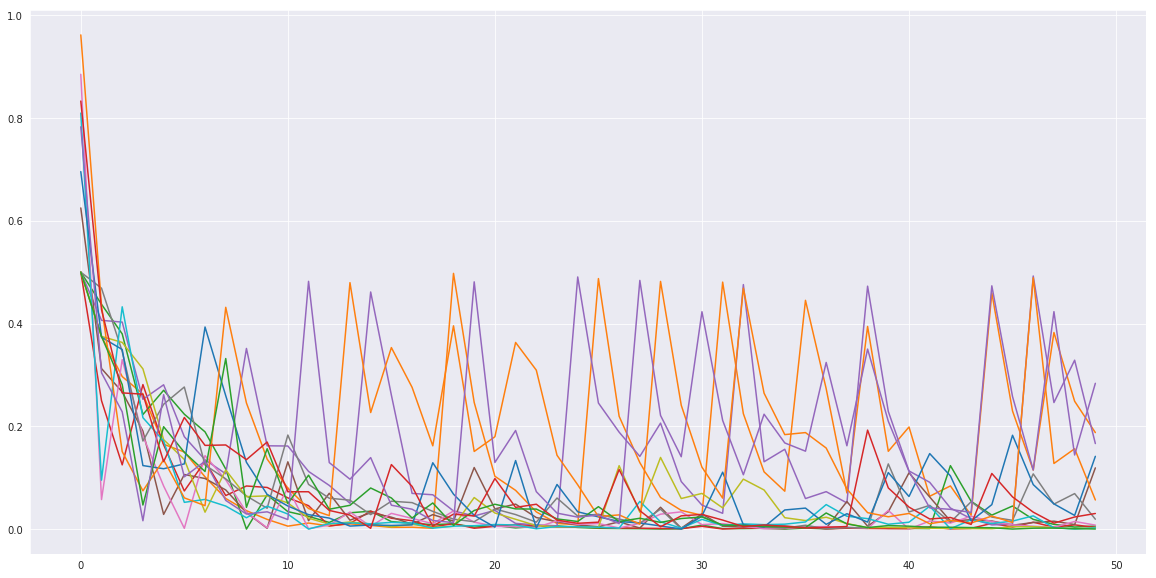

In [14]:
plt.figure(figsize=(20,10))
todas_series = [list(x)[:50] for x in deltas.values()]
for series in todas_series:
    plt.plot(series)